In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/application_train.csv')

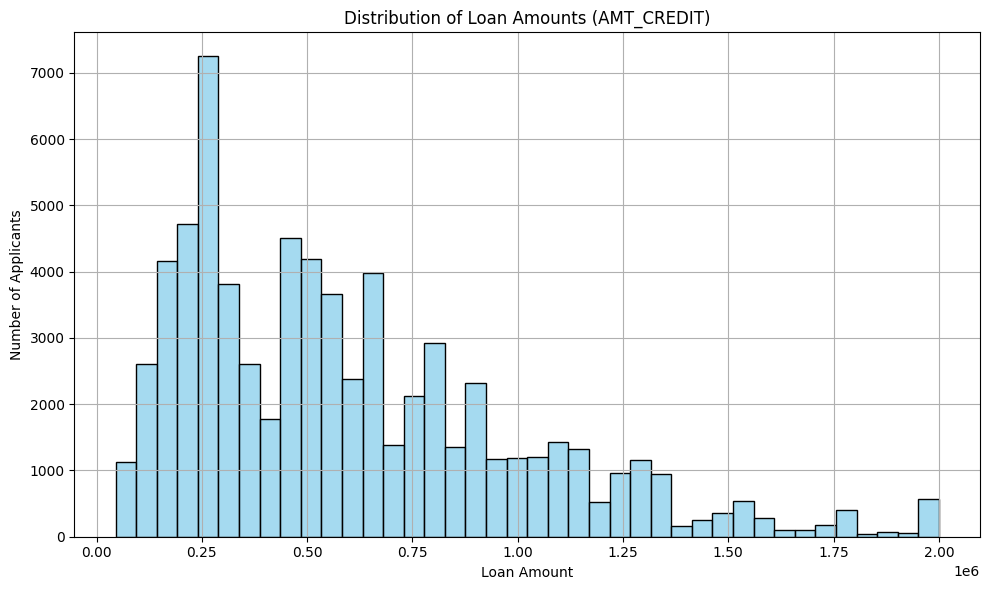

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['AMT_CREDIT'] = df['AMT_CREDIT']
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_CREDIT'], bins=40, color='skyblue')
plt.title('Distribution of Loan Amounts (AMT_CREDIT)')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

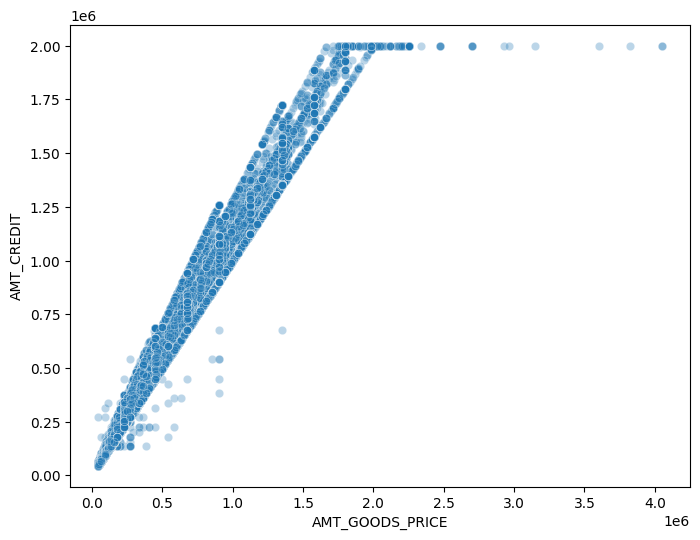

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_clean = df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].dropna()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=df_clean, alpha=0.3)


In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

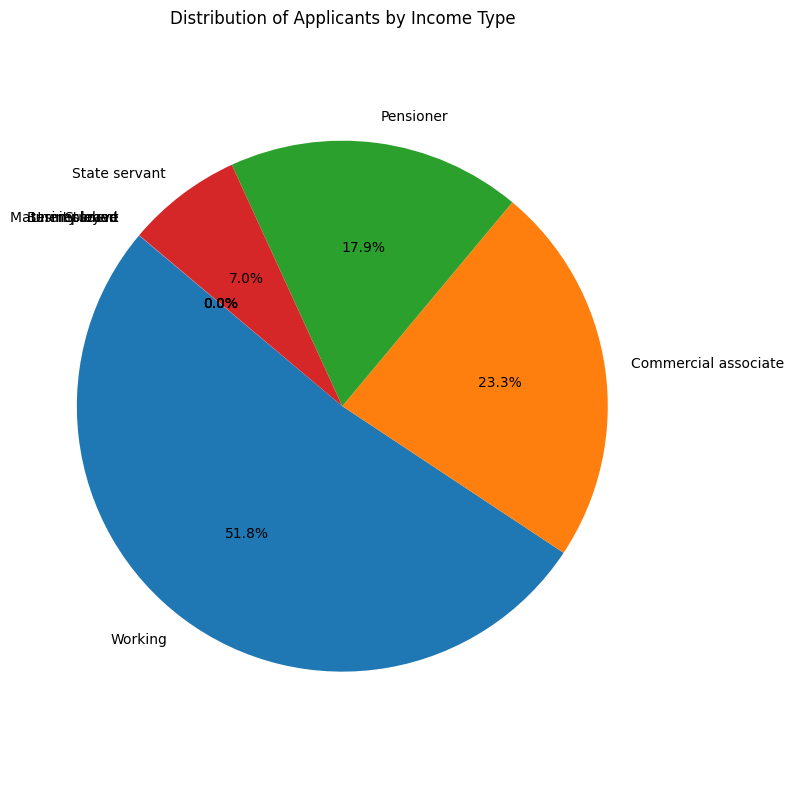

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
income_counts = df['NAME_INCOME_TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Applicants by Income Type')
plt.axis('equal')  # Make pie chart circular
plt.tight_layout()
plt.show()


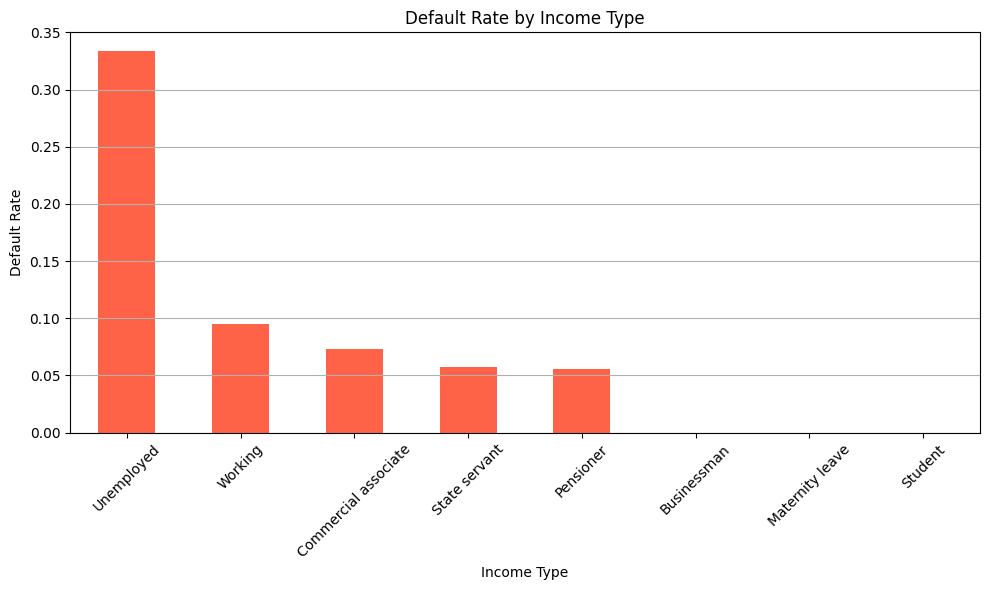

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
income_default_rates = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
income_default_rates.plot(kind='bar', color='tomato')
plt.title('Default Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


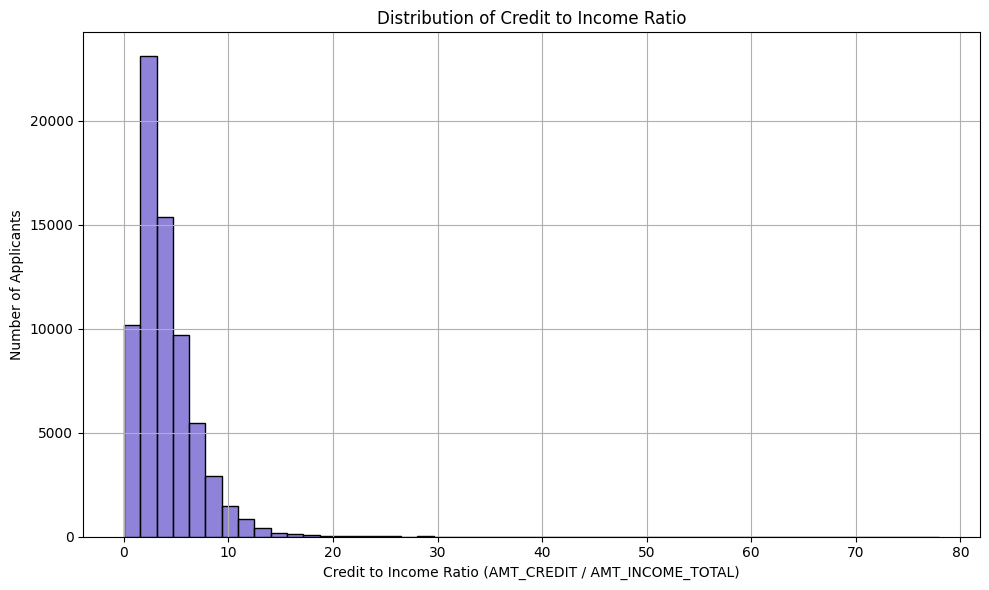

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered = df[(df['AMT_INCOME_TOTAL'] > 0) & df['AMT_CREDIT'].notnull()]
df_filtered['CREDIT_INCOME_RATIO'] = df_filtered['AMT_CREDIT'] / df_filtered['AMT_INCOME_TOTAL']

# Optional: Clip extreme values for visualization

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CREDIT_INCOME_RATIO'], bins=50, color='slateblue')
plt.title('Distribution of Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio (AMT_CREDIT / AMT_INCOME_TOTAL)')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-1796605120.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_default_rate = df_filtered.groupby('RATIO_BIN')['TARGET'].mean()


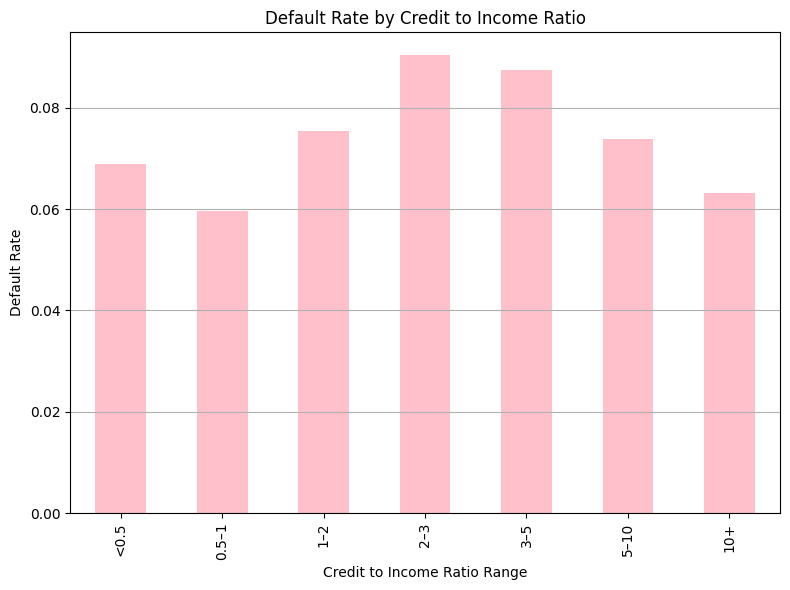

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_filtered = df[(df['AMT_INCOME_TOTAL'] > 0) & (df['AMT_CREDIT'].notnull())]
df_filtered['CREDIT_INCOME_RATIO'] = df_filtered['AMT_CREDIT'] / df_filtered['AMT_INCOME_TOTAL']
bins = [0, 0.5, 1, 2, 3, 5, 10, float('inf')]
labels = ['<0.5', '0.5–1', '1–2', '2–3', '3–5', '5–10', '10+']
df_filtered['RATIO_BIN'] = pd.cut(df_filtered['CREDIT_INCOME_RATIO'], bins=bins, labels=labels)
ratio_default_rate = df_filtered.groupby('RATIO_BIN')['TARGET'].mean()
plt.figure(figsize=(8, 6))
ratio_default_rate.plot(kind='bar', color='pink')
plt.title('Default Rate by Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio Range')
plt.ylabel('Default Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-831905544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365


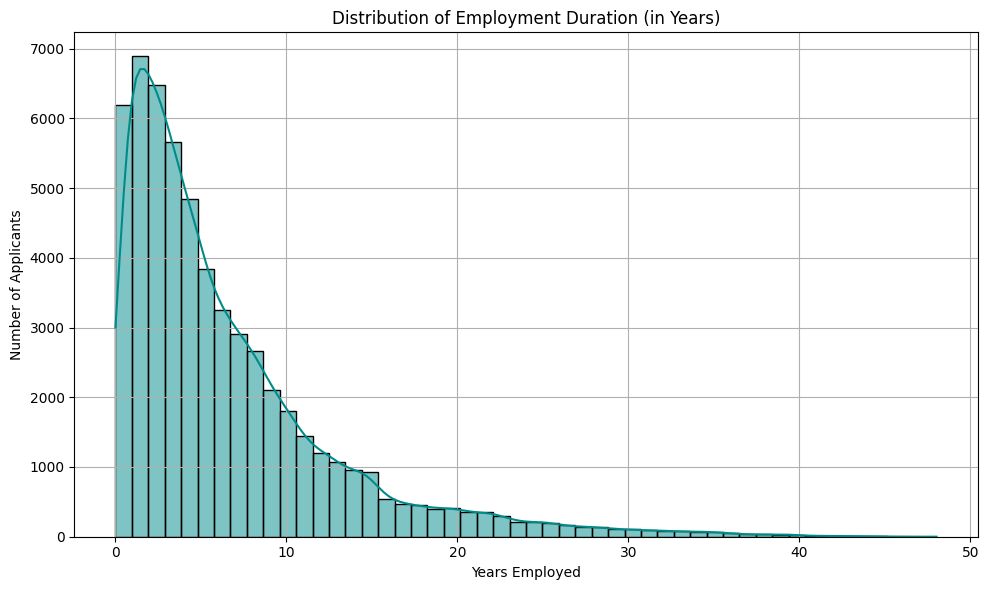

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered = df[df['DAYS_EMPLOYED'] < 100000]
df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['YEARS_EMPLOYED'], bins=50, kde=True, color='darkcyan')
plt.title('Distribution of Employment Duration (in Years)')
plt.xlabel('Years Employed')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-2815655947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
/tmp/ipython-input-28-2815655947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'], bins=bins, labels=labels)
/tmp/ipython-input-28-2815655947.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

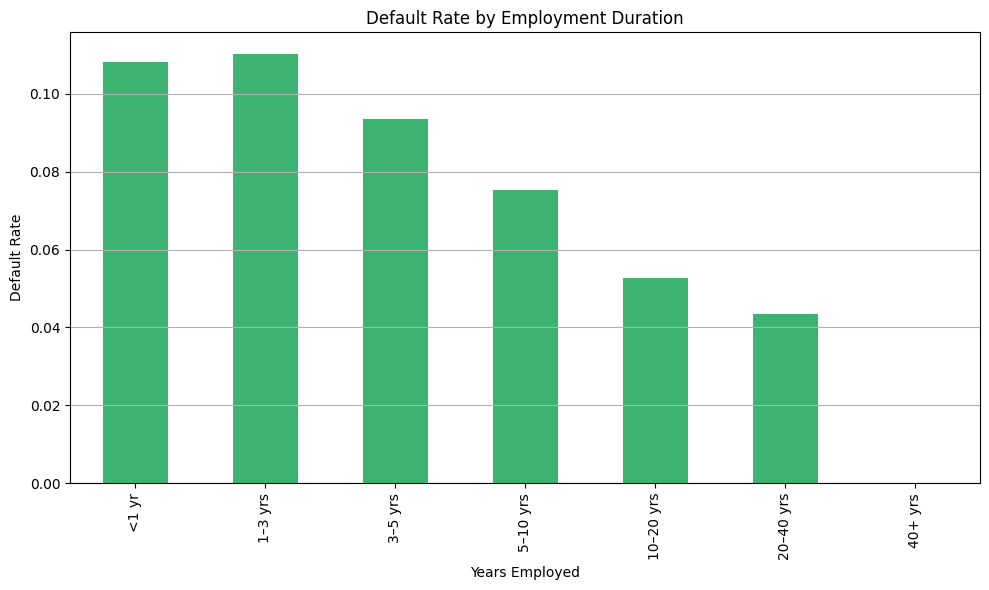

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_filtered = df[df['DAYS_EMPLOYED'] < 100000]
df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
bins = [0, 1, 3, 5, 10, 20, 40,float('inf')]
labels = ['<1 yr', '1–3 yrs', '3–5 yrs', '5–10 yrs', '10–20 yrs', '20–40 yrs', '40+ yrs']
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'], bins=bins, labels=labels)
employment_default_rate = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean()
plt.figure(figsize=(10, 6))
employment_default_rate.plot(kind='bar', color='mediumseagreen')
plt.title('Default Rate by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Default Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


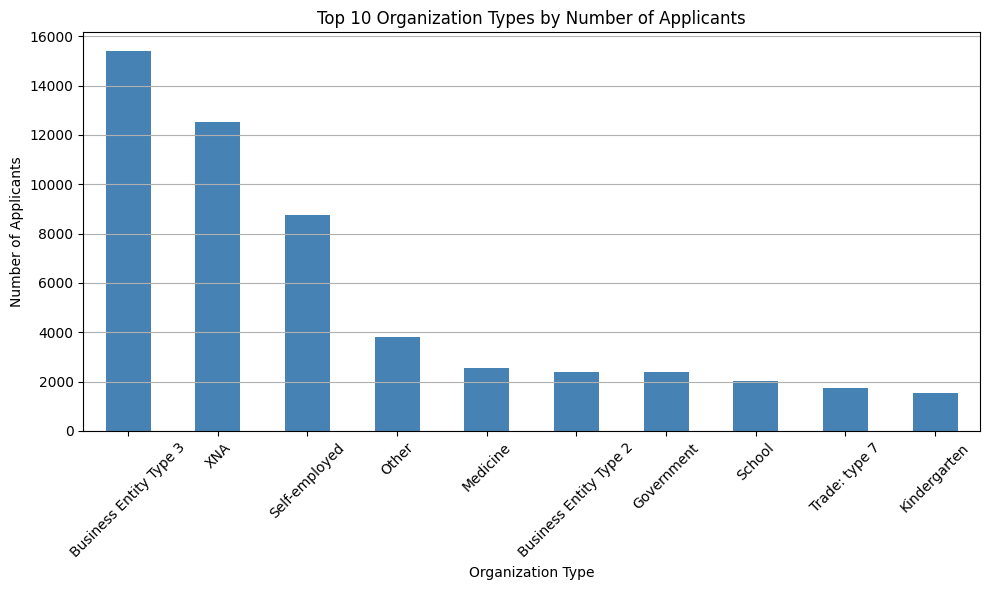

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
org_counts = df['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
org_counts.head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Organization Types by Number of Applicants')
plt.xlabel('Organization Type')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


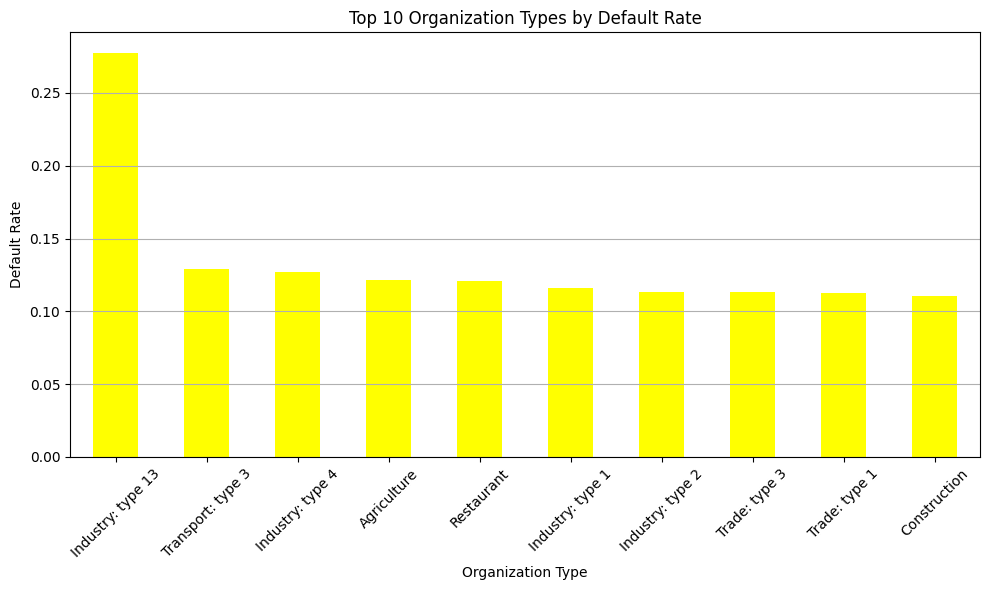

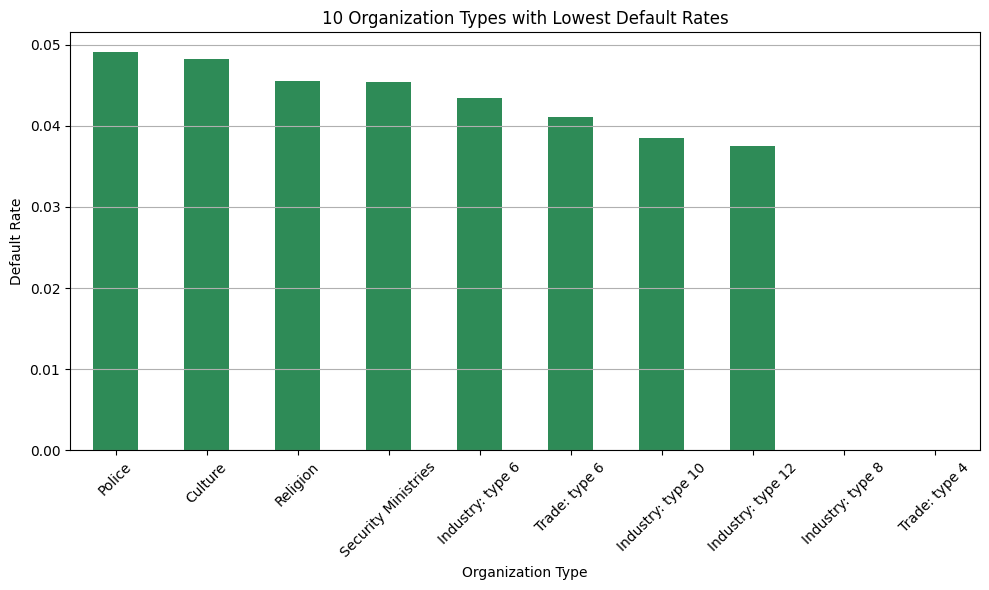

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_filtered = df[df['ORGANIZATION_TYPE'].notnull()]
org_default_rate = df_filtered.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
org_default_rate.head(10).plot(kind='bar', color='yellow')
plt.title('Top 10 Organization Types by Default Rate')
plt.xlabel('Organization Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
org_default_rate.tail(10).plot(kind='bar', color='seagreen')
plt.title('10 Organization Types with Lowest Default Rates')
plt.xlabel('Organization Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


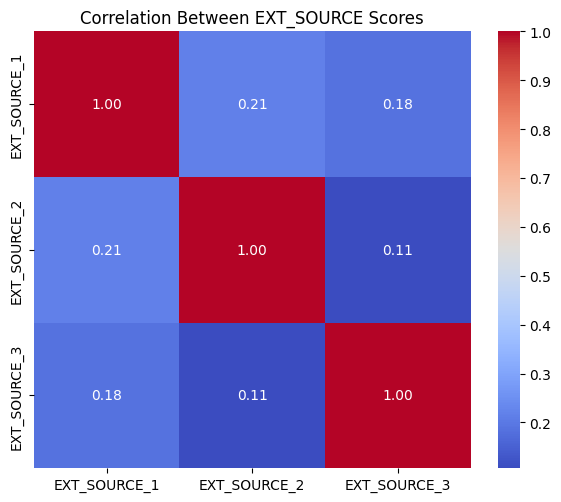

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr_matrix = ext_sources.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between EXT_SOURCE Scores')
plt.tight_layout()
plt.show()
